# MODELO DE REGRESIÓN

## Importación de librerías y datos

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
commentsDf = pd.read_excel("DataSets/comments_final.xlsx", encoding='latin-1')

In [3]:
commentsDf.head()

,id,tipo,campus,id_programa,nps,programa,id_externo_programa,id_modulo,modulo,instructor,...,fecha_inicio_modulo,fecha_fin_modulo,indicador,codigo_indicador,comentario,puntaje_sentimiento,sentimiento,categoria,subcategoria,grupo
0,1,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"Que su curso lo haga mas dinámico, tiene una v...",-0.12,Negativo,Instructor,Dinamismo y Ejercicios,4
1,2,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"El instructuor es muy bueno, conoce muy bien l...",0.46,Positivo,Instructor,Habilidad de Enseñanza,4
2,3,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,Todo estuvo bien. Me gustarían ejercicios prác...,0.10,Neutral,Instructor,Dinamismo y Ejercicios,4
3,4,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"La clase estuvo excelente, pero sería major si...",0.30,Positivo,Programa,Diseño y Estructura (Coherencia),4
4,5,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,Actividades más dinámicas durante el curso,0.22,Positivo,Instructor,Dinamismo y Ejercicios,4


### Se agregan columnas de día, mes y año

In [4]:
commentsDf['start_day'] = pd.DatetimeIndex(commentsDf['fecha_inicio_modulo']).day
commentsDf['start_month'] = pd.DatetimeIndex(commentsDf['fecha_inicio_modulo']).month
commentsDf['start_year'] = pd.DatetimeIndex(commentsDf['fecha_inicio_modulo']).year

### Se obtiene el NPS por mes y año

In [5]:
npsMonth = commentsDf[['start_month','start_year','nps']].sort_values('start_year').groupby(['start_year','start_month']).mean().dropna()
npsMonth

nps
start_year start_month           
2017       11           76.000000
           12           74.210000
2018       1            66.711775
           2            66.646169
           3            70.530493
           4            72.314089
           5            75.394792
           6            76.829931
           7            79.813980
           8            83.559746
           9            81.923239
           10           85.150396
           11           83.708701
           12           84.178310
2019       1            82.045927
           2            81.026520
           3            90.000000

In [21]:
years = commentsDf[['start_year','start_month']].drop_duplicates().sort_values(['start_year','start_month'])

years = years.iloc[3:,]

years


,start_year,start_month
1936,2017,11
2293,2017,12
43,2018,1
234,2018,2
10,2018,3
607,2018,4
0,2018,5
1740,2018,6
3420,2018,7
211,2018,8


### Lo mostramos en un Scatter Plot

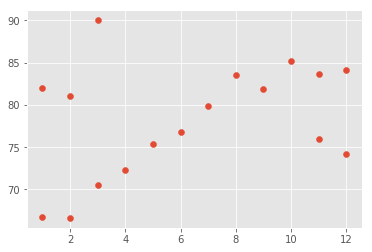

In [22]:
plt.scatter(years['start_month'],npsMonth['nps'])

### Algoritmo de regresión lineal

#### Al final del algoritmo obtenemos la R^2, que nos habla de la confiabilidad de nuestro modelo

In [27]:
dataX = years['start_month']
X_train = np.array(dataX).reshape(-1,1)
y_train = npsMonth['nps'].values

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('R2 score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [0.60617282]
Independent term: 
 74.42256331372455
Mean squared error: 36.30
R2 score: 0.13


### Una vez que tenemos los coeficientes y el modelo podemos predecir para los meses restantes del 2019

*  Hacemos el cálculo para cada mes a través de un loop y lo almacenamos en una estructura de datos, en este caso una lista.
*  Luego lo insertamos en un dataframe y podemos visualizarlo de forma tabular

In [31]:


predictedNPS = []
nextMonths = []
prediction = pd.DataFrame()
prediction['start_year'] = 2019
for i in range(4, 13):
    nextMonth = regr.predict([[i]])
    nextMonths.append(i)
    predictedNPS.append(nextMonth[0])
print(nextMonths)
print(predictedNPS)
prediction['start_month'] = nextMonths
prediction['nps'] = predictedNPS
prediction['start_year'] = 2019






[4, 5, 6, 7, 8, 9, 10, 11, 12]
[76.8472546116037, 77.45342743607348, 78.05960026054326, 78.66577308501306, 79.27194590948284, 79.87811873395262, 80.48429155842241, 81.0904643828922, 81.69663720736199]


### Predicción para los siguientes meses del 2019

In [32]:
prediction

,start_year,start_month,nps
0,2019,4,76.847255
1,2019,5,77.453427
2,2019,6,78.059600
3,2019,7,78.665773
4,2019,8,79.271946
5,2019,9,79.878119
6,2019,10,80.484292
7,2019,11,81.090464
8,2019,12,81.696637
